In [1]:
import pandas as pd

# Loading the customer's dataset
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(data.head())  # View first 5 rows

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [2]:
# checking the structure of the dataset 
print(data.info())  # Column names, data types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#checking the churn distribution
print(data['Churn'].value_counts())  # How many "Yes" vs "No" in the dataset

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [4]:
# handling the missing values
# Converts TotalCharges to numeric, replace empty strings with NaN, then fill with mean
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

C:\Users\PRATHAMANSH JASROTIA\AppData\Local\Temp\ipykernel_11216\86156504.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)


In [5]:
# droping the uneccesary column
data.drop('customerID', axis=1, inplace=True)

In [6]:
# encodes the categorical value.

# Separate features and target
X = data.drop('Churn', axis=1)  # Features
y = data['Churn'].map({'Yes': 1, 'No': 0})  # Target: 1 = Churn, 0 = No Churn

# One-hot encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [7]:
# scaling numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# split or divide the data into the training and the testing set

from sklearn.model_selection import train_test_split

# Split 80% train, 20% test, therefor the ratio is (4:1) for training and the testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 5634, Testing samples: 1409


In [9]:
# training the model
# we will use the random forest

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# making the prediction

#test the model on test set

y_pred = model.predict(X_test)

Evaluate the model

In [11]:
# calculating the metrics

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7928
F1-Score: 0.5437


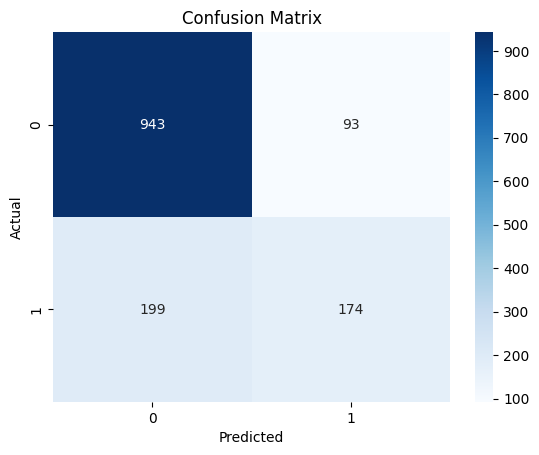

In [12]:
# visualize the confusion metrics

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
# interpreting the result

# Feature importance
feature_names = data.drop('Churn', axis=1).columns
feature_names = pd.get_dummies(data.drop('Churn', axis=1), drop_first=True).columns
importance = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
print("Top 5 Features Driving Churn:")
print(importance.head())

Top 5 Features Driving Churn:
TotalCharges                      0.190070
tenure                            0.175139
MonthlyCharges                    0.172152
InternetService_Fiber optic       0.036002
PaymentMethod_Electronic check    0.035156
dtype: float64


In [14]:
# and finally makinng the prediction

# Predict for the first test customer
sample = X_test[0].reshape(1, -1)
prob = model.predict_proba(sample)[0][1]
print(f"Churn Probability for Sample Customer: {prob:.2%}")

Churn Probability for Sample Customer: 80.00%
